In [93]:
''' 
Chapter One Benchmarking and Profiling. Profiliung is the rechnique that allows us to pinpoint most resource-intensive spots in
an application A profiler is a program that runs an application and monitors how long each function takes to execute.
BENCHMARKS: Are small scripts used to access the total execution time of your aplication

The mantra here is 
* Make it run, Make it right, Make it fast.
'''
# we will by designing the application in an obnject-oriantatied way.
class Particle:
    def __init__(self, x, y, ang_vel): # we accept + and - numbers for all paramenters
        self.x = x
        self.y = y
        self.ang_vel = ang_vel
        

# The full ParticleSimulation implementation:


class ParticleSimulator:

    def __init__(self, particles):
        self.particles = particles

    def evolve(self, dt):
        timestep = 0.00001
        nsteps = int(dt/timestep)
        for i in range(nsteps):
            for p in self.particles:
                # 1. calculate the direction
                norm = (p.x**2 + p.y**2) ** 0.5
                v_x = -p.y/norm
                v_y = p.x/norm

                #2. calculate the displacement
                d_x = timestep * p.ang_vel * v_x
                d_y = timestep * p.ang_vel * v_y

                p.x += d_x ; p.y += d_y
                # 3. repeat for all the time steps


In [94]:
from matplotlib import pyplot as plt 
from matplotlib import animation

def visualize(simulator):
    
    X = [p.x for p in simulator.particles]
    Y = [p.y for p in simulator.particles]

    fig = plt.figure()

    ax = plt.subplot(111, aspect='equal')
    line, = ax.plot(X, Y, 'ro')
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)

    def init():
        line.set_data([], [])
        return line, # the coma is important!

    def animate(i):
        # We let the particle evolve for 0.01 time units

        simulator.evolve(0.01)
        X = [p.x for p in simulator.particles]
        Y = [p.y for p in simulator.particles]

        line.set_data(X, Y)
        return line,
    


    anim = animation.FuncAnimation(fig, animate, init_func=init, blit=True, interval=10)
    
    plt.show()

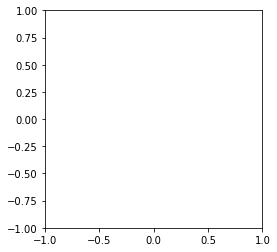

In [95]:
def test_visualize():
    particles = [Particle(0.3, 0.5, 1),
                 Particle(0.0, -0.5, -1),
                 Particle(-0.1, -0.4, 3)]
    
    simulator = ParticleSimulator(particles)
    visualize(simulator)

if __name__ == '__main__':
    test_visualize()

In [96]:
# Writing better tests and benchmarks with pytest-benchmark:

def test_evolve():
    particles = [Particle(0.3, 0.5, +1),
                 Particle(0.0, -0.5, -1),
                 Particle(-0.1, -0.4, +3)]
    
    simulator = ParticleSimulator(particles)

    simulator.evolve(0.1)
    p0, p1, p2 = particles

    def fequal(a, b, eps=1e-5):
        return abs(a - b) < eps 

    assert fequal(p0.x, 0.210269)
    assert fequal(p0.y, 0.543863)

    assert fequal(p1.x, -0.099334)
    assert fequal(p1.y, -0.490034)

    assert fequal(p2.x, 0.191358)
    assert fequal(p2.y, -0.365227)


In [97]:
import cProfile

pr =  cProfile.Profile()

pr.enable()

benchmark()

pr.disable()

pr.print_stats()

NameError: name 'uniform' is not defined

In [ ]:
''' 
Optimizing our code 
Now that we have identified where exactly our app is spending most its time, make some changes and assess the change is performance.

To express the equations of motion in terms of radius, r, and angle , alpha. (instead of x and y)
then calculate the points on a circle using the following equation
'''
r = 11

alpha = 7 
from math import cos, sin

x = r * cos(alpha)

y = r * sin(alpha)



In [ ]:
def (self, dt):
    timestep = 0.00001
    nsteps = int(dt/timestep)

    # Loop order is changed
    for p in self.particles:
        t_x_ang = timestep * p.ang_vel
        for i in range(nsteps):
            norm = (p.x**2 + p.y**2)**0.5
            p.x, p.y = (p.x - t_x_ang * p.y/norm,
                        p.y + t_x_ang * p.x/norm)


SyntaxError: invalid syntax (Temp/ipykernel_26960/1428581420.py, line 1)

In [ ]:
evolve_fast(self, dt) 

NameError: name 'evolve_fast' is not defined

In [ ]:
# The dis module: to inspect how the code is converted to bytecode, we can use the dis module

import dis

# will print for each line in the function, a list of bytecode instructions.

#dis.dis(ParticleSimulator.evolve)[2]

In [ ]:
# Pure Python Optimizations 
 
n = list(range(15))
display(n)

for i, _ in enumerate(n):
    n[i] += 1

display(n)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [ ]:
# bisect module allows fast searches on sorted arrays. 
# The bisect.bisect function can be used on a sorted list to find the index to place and elemnet 
# while maintaining the array in sorted order

import bisect

collection = [1, 2, 4, 5, 6]

# This function uses the binary search algo with O(log(N)) running time. 
# running time will increase by a constant amount every time you double your input size.

bisect.bisect(collection, 3)

2

In [ ]:
"""
If value we are trying to insert is already present in list. the function will return location after
already present value. Therefore, we can use the bisect.bisect_left variant, returning correct index.
"""

def index_bisect(a, x):
    'Locate the leftmost value exactly equal to a'
    i = bisect.bisect_left(a,  x)
    if i != len(a) and a[i] == x:
        return i
        raise ValueError

In [ ]:
"""
Dictionaries: extremely versatile and extensively used in the py language.
Dictionaries are implemented as hash maps
""" 

display(hash('hello'))


# To restrict the number to be a certain range use (%) operator

display(hash('hello') % 10)

647163784322000273

3

In [ ]:
"""
A dictionary can be used to efficiently count unique elements in a list.
In this example, we define the counter_dict function that takes a list
returning a dict containing the nunber of occurrences of each value in the list.
"""

def counter_dict(items):
    counter = {}
    for item in items:
        if item not in counter:
            counter[item] = 1
        else:
            counter[item] += 1
        return counter


In [ ]:
"""
The code can be simplified using collections.defaultdict.
Will produce dictionaries where each new key is automatically assigned a default value
"""

from collections import defaultdict

def counter_defaultdict(items):
    counter = defaultdict(int)
    for item in items:
        counter[item] += 1
    return counter

In [ ]:
"""
The collections module also includes a Counter class that can be used for the same purpose

"""
items = range(10)
from collections import Counter

counter = Counter(items)
counter

Counter({0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1})

In [ ]:
"""
Bulding an in-memory search index using a hash map
Ditionaries can be used to quickly search for a word in a list docs, similar to search engine.
build an inverted index based on a dictionary of lists
"""
docs = ['the cat is under the table',
        'the dog is under the table',
        'cats and dogs smell roses'
        'Carla eats an apple']

# simple way to retrieve all documents that match a query is scan each document and test for the presence of a word

matches = [doc for doc in docs if 'table' in doc]

matches

['the cat is under the table', 'the dog is under the table']

In [ ]:
# building and index
index = {}

for i, doc in enumerate(docs):
    # We iterate over each term in the document
    for word in doc.split():
        # We build a list containing the indices, where term appears
        if word not in index:
            index[word] = [i]
        else:
            index[word].append(i)

# After bulding index, doing a query is a simple dic look up.

index_result = index['table']
display(index_result)

result_documents = [docs[i] for i in index_result]
display(result_documents)


[0, 1]

['the cat is under the table', 'the dog is under the table']

In [ ]:
# Sets: cointain only unique elements.

#x = list(range(500)) + list(range(500))

x_solo = set(['javier', 'javier'])

x_solo

{'javier'}

In [ ]:
# Building an index using sets

index = {}

for i, doc in enumerate(docs):
    # We iterate over each term in documents
    for word in doc.split():
        # build a set containing the indices, where term appears
        if word not in index:
            index[word] = {i}
        else:
            index[word].add(i)
# Querying the documents containing both 'cat' and 'table'
index['cat'].intersection(index['table'])

{0}

In [ ]:
# Heaps: built using the procedures contained in haepq module on an underlying list.

import heapq

heapq_collection =  [10, 3, 3, 4,  5, 6]

heapq.heapify(heapq_collection)

display(heapq_collection)

# To perform insertion and extraction operations on  the heap we can use the heapq.heappush and heapq.heappop
# function will extract the min val in collection in O(log(N)) time 

display(heapq.heappop(heapq_collection))

# Similarly, you can push with

heapq.heappush(heapq_collection, 1991)


display(heapq_collection)


[3, 3, 6, 4, 5, 10]

3

[3, 4, 6, 10, 5, 1991]

In [ ]:
"""
Another optionis queue.PriorityQueue class that,is thread and process-safe.
The PriorityQueue class can be filled up with using the PriorityQueue.put method,
while PriorityQueue.get can be used to be extract the minimin value in collection
"""

from queue import PriorityQueue

queue = PriorityQueue()
for element in collection:
    queue.put(element)

queue.get()

1

In [ ]:
queue = PriorityQueue()
queue.put((3, "priority 3"))
queue.put((2, "priority 2"))
queue.put((1, "priority 1"))

queue.get()


(1, 'priority 1')

In [ ]:
# Tries(sometimes called a prefix tree).
# Tries are extremely fast at matching a list of strings against a prefix.


from random import choice
from string import ascii_uppercase
from patricia import trie

def random_string(length):
    '''Produce a random string made of *length* uppercase ascii chars'''
    return ''.join(choice(ascii_uppercase) for i in range(length))

In [ ]:
strings = [random_string(32) for i in range(500)]

matches = [s for s in strings if s.startswith('AA')]

# List comprehension and str.startwith are already very optimized operations

%timeit [s for s in strings if s.startswith('AA')]

49.5 µs ± 3.08 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [ ]:
strings_dict = {s:0 for s in strings}

# A dictionary where all values are 0

strings_trie = trie(**strings_dict)

# To query patricia-trie for a matching prefix

iterMatches = list(strings_trie.iter('AA'))

# Now we time 

%timeit list(strings_trie.iter('AA'))

3.88 µs ± 364 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [ ]:
""" 
Caching and memoization
Caching is a great technique used to improve the performance of a wide range of applications.

Given the usefulness of this technique,
the Py standard library includes a simple inmemory cache in functools module

"""


' \nCaching and memoization\nCaching is a great technique used to improve the performance of a wide range of applications.\n\nGiven the usefulness of this technique,\nthe Py standard library includes a simple inmemory cache in functools module\n\n'

In [ ]:

from functools import lru_cache

@lru_cache()
def sum2(a, b):
    print("Calculating {} + {}".format(a, b))
    return a + b 

print(sum2(4, 2))
print(sum2(1, 2))

Calculating 4 + 2
6
Calculating 1 + 2
3


In [ ]:

"""
The lru_cache deco also provides other basic features. To restrict the size od the cache,
one can set the number of elements we inted to maintain through the max_size argument.
If we want unbounded cache specify None.
"""


'\nThe lru_cache deco also provides other basic features. To restrict the size od the cache,\none can set the number of elements we inted to maintain through the max_size argument.\nIf we want unbounded cache specify None.\n'

In [ ]:
@lru_cache(maxsize=8)
# this way we execute sum2 with different arguments,cache will reach a max size
# and keep requesting more calculations, new values replacing older values in cache
def mul2(a, b):
    print("Calculating {} + {}".format(a, b))
    return a * b 

print(mul2(4, 2))
print(mul2(1, 2))

Calculating 4 + 2
8
Calculating 1 + 2
2


In [ ]:
"""
The lru_cache decorator also adds extra functionalities to the docorated fucntion.
Examine cache performance using cache_info method, and possible to reset cache with cache_clear method.
"""

sum2.cache_info()

CacheInfo(hits=0, misses=2, maxsize=128, currsize=2)

In [ ]:
sum2.cache_clear()

In [ ]:
# Example of benefit from caching. 
# Define fibonacci fun and time it

def fibona(n):
    if n < 1:
        return 1
    else:
        return fibona(n - 1) + fibona(n - 2)

%timeit fibona(20)

3.31 ms ± 97.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
import timeit 

setup_code = '''

from functools import lru_cache
from __main__ import fibona
fibona_memoized = lru_cache(maxsize=None)(fibona)
'''

results = timeit.repeat(
    'fibona_memoized(20)',
    setup=setup_code,
    repeat=1000,
    number=1)

print("Fibona took {:.2f} us".format(min(results)))

Fibona took 0.00 us


In [ ]:
# Joblib provides a simple on-disk cache is joblib. used similar as lru_cache,
# results will stored on disk and will persist between runs.

In [ ]:
from joblib import Memory

memory = Memory(location='.')

In [ ]:
# results will be stored on-disk in the directory specified
# by the cachedir argument during Memory initialization. cached results persist over runs.
# allows limit of recomputation only when certain arguments change,
# and the resulting decorated function supports basic functionalities to clear and analyze the cache.
# Perhaps the best joblib feature is the intelligent hashing algo proving
# efficient memoization of functions that operate on np arrays.
 


@memory.cache
def Msum2(a, b):
    return a + b


In [ ]:


Msum2(5,5)

________________________________________________________________________________
[Memory] Calling __main__-C%3A-Users-JBarr-AppData-Local-Temp-ipykernel_26960-2913515201.Msum2...
Msum2(5, 5)
____________________________________________________________Msum2 - 0.0s, 0.0min


10

In [ ]:
# Comprahansions and generators
# We will explore strategies to speed up Py loops using comprahansions and generators.

def loop():
    res = []
    for i in range(100000):
        res.append( i * i)
    return sum(res)

def comprehension():
    return sum([i * i for i in range(100000)])

def generator():
    return sum(i * i for i in range(100000))

In [ ]:
%timeit loop()


12.2 ms ± 180 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
%timeit comprehension()

9.23 ms ± 127 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
%timeit generator()

9.01 ms ± 105 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
def sqloop():
    resDict = {}
    for i in range(100000):
        resDict[i] = i
    return resDict


def sqcomprehension():
    return {i: i for i in range(100000)}

In [ ]:

%timeit sqloop()


10.5 ms ± 148 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
9.79 ms ± 162 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:

%timeit sqcomprehension()

In [ ]:
# Efficient looping (especially in terms of memory)
# done using iterators and functions such as filter and map.

def map_comprehension(numbers):
    a = [n * 2 for n in numbers]
    b = [n ** 2 for n in a]
    c = [n ** 0.33  for n in b]
    return max(c)


def map_normal(numbers):
    a = map(lambda n: n * 2, numbers)
    b = map(lambda n: n ** 2, a)
    c = map(lambda n: n ** 0.33, b)
    return max(c)

In [ ]:


numbers = range(1000000)

%timeit map_comprehension(numbers)



717 ms ± 11 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
import numpy as np

In [ ]:
""" 
Chapter 3:
    Fast Array Operatons with Numpy and Pandas

"""

A = np.array([0,1,2,3,4,5,6,7,8,9])


print(A[0])

print([a for a in A])

0
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [ ]:
"""
Ex: shows how slocing syntax can be used in real-world setting

"""

r_i = np.random.rand(10, 2)


x_i = r_i[:, 0]

print(x_i)

r_0 = r_i[0, :]

print(r_0)

[0.44597815 0.21267435 0.4561251  0.73388409 0.07857339 0.03318415
 0.33149939 0.51394725 0.04624381 0.56904135]
[0.44597815 0.19365108]


In [ ]:


A = A.astype('float32')

B = np.array([
    [0, 1, 2],
    [3, 4 ,5]])

print(A, B)

print(B.reshape(1,6))

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.] [[0 1 2]
 [3 4 5]]
[[0 1 2 3 4 5]]


In [ ]:
a = np.array([
    [0.5653667, 0.40387571],
    [0.47862077, 0.47436663],
    [0.8769373, 0.13338962],
    [0.04260282, 0.13847179]
    ])

idx = np.array([0,2])

print([i for i in a])

print(a.sum())

print(a[idx])


[array([0.5653667 , 0.40387571]), array([0.47862077, 0.47436663]), array([0.8769373 , 0.13338962]), array([0.04260282, 0.13847179])]
3.1136313400000004
[[0.5653667  0.40387571]
 [0.8769373  0.13338962]]


In [ ]:

print(
    a[0,1],
    a[0:1],
    a[0:2]
    )

0.40387571 [[0.5653667  0.40387571]] [[0.5653667  0.40387571]
 [0.47862077 0.47436663]]


In [ ]:
"""
Broadcasting: Whenever doing arithmetic operation on two arrays (like a product),
if the two operands have the same shape, the operation will be applied in an element-wise fashion.
norm = np.sqrt(x**2 + y**2)

"""

J = np.array([[1,2], [3,4]])


M = np.array([[5,6], [7,8]])


print(J * M)

print(J * 2)


[[ 5 12]
 [21 32]]
[[2 4]
 [6 8]]


In [ ]:

import time

dt = time
dt = dt.localtime()


r_i = np.random.rand(10, 2)
norm = np.sqrt((r_i ** 2).sum(axis=1))
print(norm)

[0.47801357 0.91883939 0.52447843 0.23554053 0.42972729 1.15688477
 0.83642145 0.79409513 0.81112134 0.89509751]


In [ ]:
# Rewriting the particle simulator in NumPy 

def evolve_numpy(self, dt):
    timestep = 0.00001
    nsteps = int(dt/timestep)

    r_i = np.array([[p.x, p.y] for p in self.particles])

    ang_vel_i = np.array([p.ang_vel for p in self.particles])

    for i in range(nsteps):
        norm_i = np.sqrt((r_i ** 2).sum(axis=1))
        v_i = r_i[:, [1, 0]]
        v_i[:, 0] *= -1
        v_i /= norm_i[:, np.newaxis]
        d_i = timestep * ang_vel_i[:,np.newaxis] * v_i
        r_i += d_i

        for i, p in enumerate(self.particles):
            p.x, p.y = r_i[i]

In [ ]:

def benchmarkNP(npart=100, nethod='python'):
    particles = [Particle(uniform(-1.0, 1.0),
                          uniform(-1.0, 1.0),
                          uniform(-1.0, 1.0))
                          for i in range(npart)]

In [ ]:
import numexpr as ne

from math import sqrt

import pandas as pd

import sys



In [ ]:
# Reaching optimal performance with numexpr: usage is straightfoward and based on single function numexpr.evaluate. 
# Function takes a string containing an array expression as its first argument.

# The package increases performance in all cases, nut to get substantial advantage, you should use it with large arrays.
a = np.random.rand(10000)

b = np.random.rand(10000)

c = np.random.rand(10000)

d = ne.evaluate('a + b * c')



In [ ]:
d[:25]

array([1.0462232 , 0.51434298, 1.05022678, 1.15370087, 1.04244047,
       0.52579164, 0.60602792, 1.19161307, 0.11581497, 1.16671212,
       1.05945062, 0.02899721, 0.69442602, 0.80409631, 1.41466298,
       0.57621561, 0.26500627, 0.68988331, 0.70537004, 0.08293559,
       1.18902913, 1.01199504, 0.96187848, 0.51409063, 0.78158571])

In [ ]:
x_j = 1.41466298

x_i = 1.16671212

y_j = 0.60602792

y_i = 0.26500627

x_ij = x_j - x_i

y_ij = y_j = y_i

d_ij = sqrt(x_ij **2 + y_ij**2)


In [ ]:
r = np.random.rand(10000, 2)

r_i = r[:, np.newaxis]

r_j = r[np.newaxis, :]

d_ij = r_j - r_i

d_ij = np.sqrt((d_ij ** 2).sum(axis=2))


In [ ]:
# most of numpy math functions are also available in numexpr. The limitations are reduction operations
# (ones that reduce axis must happen last) Therefore we first calculate the sum then step out of numexpr
# and calculate square root in diff expression

d_ijTest = np.sqrt((d_ij ** 2))

d_ijN = ne.evaluate('sqrt((d_ij ** 2))')


%timeit d_ijN

%timeit d_ijTest 

18.3 ns ± 0.493 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)
20 ns ± 0.553 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)


In [ ]:
""" 
Pandas: performance considerations
Some differences between an index in Pandas and a dictionary. while keys in dict cannot contain diplicated index can.
Which may incur performance cost. access will be O(N) linear search rather than O(1) like dict.

We can mitigate this via sorting the index. Allowing the use of binary search running at O(log(N))
"""

# Create a series with dipliucate index

index = list(range(1000)) + list(range(1000))

# Accessing a normal series is a O(N) operation

series = pd.Series(range(2000), index=index)

# Sorting index will improve look-up scaling to O(log(N))

series.sort_index(inplace=True)


In [ ]:
# Database-style operations with pandas
# Pandas supports element-wise operations 

df = pd.DataFrame(series / 4, columns=['sys_init'])[:7]


np.log(df.sys_init) # Logarithm of a Series

np.log(df) # Logarithm of a df

C:\Users\JBarr\anaconda3\envs\dev\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,sys_init
0,-inf
0,5.521461
1,-1.386294
1,5.522460
2,-0.693147
2,5.523459
3,-0.287682


In [ ]:
# Mapping
'''
pd can also do element-wise operations berween two pd.Series like np.

Difference that operands are machted by key not by postion. mismatch in idex leads to resulting value = NaN

Pandas exposes the map, apply and  applymap methods that can be used to apply specific transformations

'''

a = pd.Series([1, 2, 3], index=['a', 'b', 'c'])

def superstar(x):
    return '*' + str(x) + '*'

print(a.map(superstar))

# equivalent of pd.series.map but for df

print(df.applymap(superstar))

a    *1*
b    *2*
c    *3*
dtype: object
   sys_init
0     *0.0*
0   *250.0*
1    *0.25*
1  *250.25*
2     *0.5*
2   *250.5*
3    *0.75*


In [ ]:
"""
C Performance with Cython: Compiling Cython extensions 
canbe compiled using distutils. By writting a setup.py script,
we compile .pyx directly to extension module




from distutils.core import setup

from Cython.Build import  cythonize

setup(
    name = 'Hello',
    ext_modules = cythonize('helloW.pyx')  
)

"""

"""
Cython modules can also be automatically compiled using pyzimport.
Call pyximport.install()

"""
import pyximport
pyximport.install()
import helloW

helloW.hello()

Hello, World


In [ ]:
%load_ext Cython

In [ ]:
%%cython -a

def  hello_nip():
    print('Hello, World')

In [ ]:
hello_nip()

Hello, World


In [ ]:
# Adding static types: Variables.

"""
In Cy we declare the type of a var prepending var with cdef and respective type.

cdef can be used in multiple contexts, such as variables, functions, and extensions types

"""


'\nIn Cy we declare the type of a var prepending var with cdef and respective type.\n\ncdef can be used in multiple contexts, such as variables, functions, and extensions types\n\n'

In [ ]:

%%cython

cdef int i


In [ ]:
%%cython 
import numpy as np

cdef int max(int a, int b):
    return a if a > b else b


catch = max(22, 25)


In [ ]:
%%cython -a

cdef int chebyshev(int x1, int y1, int x2, int y2):
    return max(abs(x1 - x2), abs(y1 - y2))


In [ ]:
%%cython

cdef double a, b = 2.0, c = 3.0


In [ ]:
# Assessing the speed gains
import pyximport
pyximport.install()

(None, <pyximport.pyximport.PyxImporter at 0x2468b41fc88>)

In [ ]:

%%cython 
def example():
    cdef int i, j=0
    for i in range(100):
        j += 1
    return j



In [ ]:
def example_py():
    j = 0 
    for i in range(100):
        j += 1
    return j

    

In [ ]:
%timeit example()

%timeit example_py()

106 ns ± 0.842 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
2.9 µs ± 129 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [ ]:
# If we declare a variable to be of the object type, it accepts any kind of Py Object.


In [ ]:
%%cython

cdef object a_py

a_py = 'hello'
a_py =  1


In [ ]:
""" 
Functions: add type information to the arguments of a Py function by specifying the type in front of each of the arg names.
Functions specified this way will work and perform like regular py functions but arg will be type-checked.
"""

In [ ]:
%%cython
def max_py(int a, int b):
    return a if a > b else b

In [ ]:
# A function specified this way still need to switch back to interpreter.
# To allow Cython for call op, declare type of return type using a cdef statement.


In [ ]:
%%cython
cdef max_Cy(int a, int b):
    return a if a > b else b

In [ ]:
# cdef function cant be called inside of py only Cy 
# cpdef Cython generates two versions of funtion. Py verion & Cy version.


In [ ]:

%%cython
cpdef max_two(int a, int b):
    return a if a > b else b

In [ ]:
# When a function is small add inline keyword to replace defition with body of function


In [ ]:
%%cython
cdef inline int max_inline(int a, int b):
    return a if a > b else b

In [ ]:

# Classes: define extension using cdef class statement and declaring attributes in class body.

# Accessing declared att in class method allows Cy to bypass py att look-ups.


In [ ]:

%%cython

cdef class Point:
    cdef double x
    cdef double y

    def __init__(self, double x, double y):
        self.x = x
        self.y = y



In [ ]:
# You need to declare type of vars intended for use at compile time. 



In [ ]:

%%cython


cdef class Point:
    cdef public double x

In [ ]:
""" 
Sharing declarations:
When cythoning you may want to reorganize most used functions and classes declaration in separate file so they can reused in diff modules.

Cy allows to put these components in a definition file and access them with cimport statements.

definition files also interface with external C code. 


To share functions, we need to write a defintion file with a .pxd extension. The file contains the types and function protypes 
"""


In [ ]:

%%cython

from mathlib cimport max

def chebyshev(int x1, int y1, int x2, int y2):
    return max(abs(x1 - x2), abs(y1 - y2))

In [ ]:
"""
C arrays and pointers

C arr are collection of items of the same type, stored contigously in memory.
Review: How memory is managed in C. Variables in C are containers.
When creating a variable, a space in memory is reserved to store its value.
If we create a variable containing a  64 bit floating point number (double)
The program will allocate 64 bit (16 bytes) of memory. 
This portion of memory can be accessed through  an address to that memory location.


To obtain address of var, use address operator denoted by &.
Also the printf funtion, 

_____________________________________

Memory address can be stored in special variables, pointers, that can be declared by putting a * prefix in front of var name
%%cython

from libc.stdio cimport printf

cdef double a
cdef double *a_pointer
a_pointer = &a 

a = 3.0

printf(a_pointer)

_________________________________________

When declaring a C array, the program allocates enough space to accommodate all the elements requested. 
In Cy we declare such array using.

The arr variable in fact, points to memory loc of 0th element in array.

Verify the add of the first element od arr is  the add contained in the arr

___________________________________________

"""

'\nC arrays and pointers\n\nC arr are collection of items of the same type, stored contigously in memory.\nReview: How memory is managed in C. Variables in C are containers.\nWhen creating a variable, a space in memory is reserved to store its value.\nIf we create a variable containing a  64 bit floating point number (double)\nThe program will allocate 64 bit (16 bytes) of memory. \nThis portion of memory can be accessed through  an address to that memory location.\n\n\nTo obtain address of var, use address operator denoted by &.\nAlso the printf funtion, \n\n_____________________________________\n\nMemory address can be stored in special variables, pointers, that can be declared by putting a * prefix in front of var name\n%%cython\n\nfrom libc.stdio cimport printf\n\ncdef double a\ncdef double *a_pointer\na_pointer = &a \n\na = 3.0\n\nprintf(a_pointer)\n\n_________________________________________\n\nWhen declaring a C array, the program allocates enough space to accommodate all the el

In [ ]:

%%cython

cdef double a = 1


In [ ]:
%%cython

cdef double a = 1

from libc.stdio cimport printf
printf("%p", &a)

In [ ]:
%%cython

from libc.stdio cimport printf

cdef double a
cdef double *a_pointer
a_pointer = &a


In [ ]:
%%cython

cdef double arr[10]

In [ ]:
%%cython

cdef double arr[5][2]

In [ ]:
%%cython


from libc.stdio cimport printf

cdef double arr[10]

printf("%p\n",  arr)
printf("%p\n", &arr[0])

In [ ]:

# NNP arr: Cy provides a np module with better support for direct iteration.



In [ ]:
%%cython
import numpy as np
def numpy_bench_py():
    py_arr = np.random.rand(1000)
    cdef int i 
    for i in range(1000):
        py_arr[i]  += 1



In [ ]:
%%cython
cimport numpy as c_np
import numpy as np


def numpy_bench_c():
    cdef c_np.ndarray[double, ndim=1] c_arr
    c_arr = np.random.rand(1000)
    cdef int i

    for i in range(1000):
        c_arr[i]  += 1

In [ ]:
%timeit numpy_bench_c()

%timeit numpy_bench_py()

9.77 µs ± 350 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
375 µs ± 12.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
"""
Typed memoryviews:

A memoryview an object that maintains a reference on a specific memory area. It does not own the data but can read and change it contents:
in other words it is a view on the underlying data.

We define using special syntax. Lets define a memoryview of int and a two-dim memoryview of double
"""

In [66]:
%%cython
cimport numpy as c_np

cdef int[:] a

cdef double[:, :] b

In [72]:
%%cython
cimport numpy as c_np
import numpy as np 

cdef int[:] arr
arr_np = np.zeros(10, dtype='int32')

arr = arr_np

arr[2]  = 1 
print(arr_np)

[0 0 1 0 0 0 0 0 0 0]


In [87]:
# Particle simulator in Cython. Thanks t Cy we can convert loops in C removing overhead in Py interpreter.
# We dont need a return value for c_evolve val are updated in the r_i arr in place. 
# Benchmark untyped cy ver against old nump version


In [90]:

%%cython
import time
cimport numpy as c_np
import numpy as np 


def evolve_numpy(self,dt):
    timestep = 0.00001
    nsteps = int(dt/timestep)

    r_i = np.array([[p.x, p.y] for p in self.particles])
    ang_speed_i = np.array([p.ang_speed for p in self.particles])
    v_i = np.empty_like(r_i)

    for i in range(nsteps):
        norm_i = np.sqrt((r_i ** 2).sum(axis=1))

        v_i = r_i[:, [1,0]]
        v_i[:, 0] *= -1
        v_i /= norm_i[:, np.newaxis]

        d_i = timestep * ang_speed_i[:, np.newaxis] * v_i

        r_i +=  d_i

    for i, p in enumerate(self.particles):
        p.x, p.y =  r_i[i]

def evolve_cython(self,dt):
    timestep = 0.00001
    nsteps = int(dt/timestep)
    
    r_i = np.array([[p.x, p.y] for p in self.particles])
    ang_speed_i = np.array([p.ang_speed for p in self.particles])

    c_evolve(r_i, ang_speed_i, timestep, nsteps)
    
    for i, p in enumerate(self.particles):
        p.x, p.y =  r_i[i]


def c_evolve(r_i, ang_speed_i, timestep, nsteps):
    v_i = np.empty_like(r_i)

    for i in range(nsteps):
        norm_i = np.sqrt((r_i ** 2).sum(axis=1))

        v_i = r_i[:, [1,0]]
        v_i[:, 0] *= -1
        v_i /= norm_i[:, np.newaxis]

        d_i = timestep * ang_speed_i[:, np.newaxis] * v_i

        r_i +=  d_i
        

In [100]:

def benchmark(npart=100, method='python'):
    particles =  [Particle(uniform(-1.0, 1.0),
                           uniform(-1.0, 1.0),
                           uniform(-1.0, 1.0))
                           for i in range(npart)]
    simulator = ParticleSimulator(particles)
    if method =='python':
        simulator.evolve_python(0.1)
    elif method == 'cython':
        simulator.evolve_cython(0.1)
    elif method ==  'numpy':
        simulator.evolve_numpy(0.1) 


In [ ]:
# adding types to the function arguments: Delcare arrays as types mem views containing double vals.
# passing arr of type int of float32 casting wont happen automatically
#%timeit benchmark(100, 'cython')

In [117]:

%%cython
from  libc.math cimport sqrt


def C_evolve(double[:, :] r_i, double[:] ang_speed_i, double timestep, int nsteps):

    cdef int i, j  
    cdef int nparticles = r_i.shape[0]

    for i in range(nparticles):
        x = r_i[j, 0]
        y = r_i[j, 1]
        ang_speed = ang_speed_i[j]

        norm = sqrt(x ** 2 + y **2)

        vx = (-y)/norm
        vy = x/norm

        dx = timestep * ang_speed * vx
        dy = timestep * ang_speed * vy

        r_i[j, 0] += dx
        r_i[j,1] += dy

cdef double norm, x, y, vx, vy, dx, dy, ang_speed